In [1]:
# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from prophet import Prophet

# プロジェクト内モジュール
from gamedata import hard_sales as hs

hard_sales_df = hs.load_hard_sales()

Importing plotly failed. Interactive plots will not work.


In [ ]:
pivot_sales = hs.pivot_sales(hard_sales_df)

def forecast_sales(pivot_df: pd.DataFrame, hw: str, weeks:int = 50) -> (Prophet, pd.DataFrame):
    
    # Switch2直前セール
    
    before_switch2 = pd.DataFrame({
        'holiday': 'before_switch2',
        'ds': pd.to_datetime(['2025-05-28']),
        'lower_window': 0,
        'upper_window': 13,
        'prior_scale': 1.2
    })

    # 2025新生活セール
    
    newlife_2025 = pd.DataFrame({
        'holiday': 'newlife_2025',
        'ds': pd.to_datetime(['2025-02-28']),
        'lower_window': 0,
        'upper_window': 30,
        'prior_scale': 1.1
    })

    # 2024夏セール
    summer_202409 = pd.DataFrame({
        'holiday': 'summer_202409',
        'ds': pd.to_datetime(['2024-09-26']),
        'lower_window': 0,
        'upper_window': 13,
        'prior_scale': 1.1
    })

    # 2024値上げ
    priceup_202409 = pd.DataFrame({
        'holiday': 'priceup_202409',
        'ds': pd.to_datetime(['2024-09-01']),
        'lower_window': 0,
        'upper_window': 150,
        'prior_scale': 0.9
    })

    # 2023新型で供給制限緩和
    slim_202309 = pd.DataFrame({
        'holiday': 'slim_202309',
        'ds': pd.to_datetime(['2023-09-01']),
        'lower_window': 0,
        'upper_window': 365,
        'prior_scale': 1.5
    })

   # promotions = pd.concat([before_switch2, newlife_2025], ignore_index=True)

    sales = pivot_df[hw].dropna().reset_index()
    sales.rename(columns={'report_date': 'ds', hw: 'y'}, inplace=True)
    model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.06)
    model.fit(sales)
    future = model.make_future_dataframe(periods=weeks, freq='W')
    forecast = model.predict(future)
    return model, forecast


In [ ]:
ps5_model, ps5_forecast = forecast_sales(pivot_sales, 'PS5')
ps5_future_data = ps5_forecast[['ds', 'yhat']]
ps5_future_data.info()
ps5_future_data.tail(60)


21:33:02 - cmdstanpy - INFO - Chain [1] start processing
21:33:02 - cmdstanpy - INFO - Chain [1] done processing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      297 non-null    datetime64[ns]
 1   yhat    297 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


,ds,yhat
237,2025-06-01,12503.215219
238,2025-06-08,14134.397293
239,2025-06-15,16699.128013
240,2025-06-22,17715.000375
241,2025-06-29,16306.707556
242,2025-07-06,14204.300109
243,2025-07-13,13625.589103
244,2025-07-20,14690.361837
245,2025-07-27,15550.888442
246,2025-08-03,14893.875716


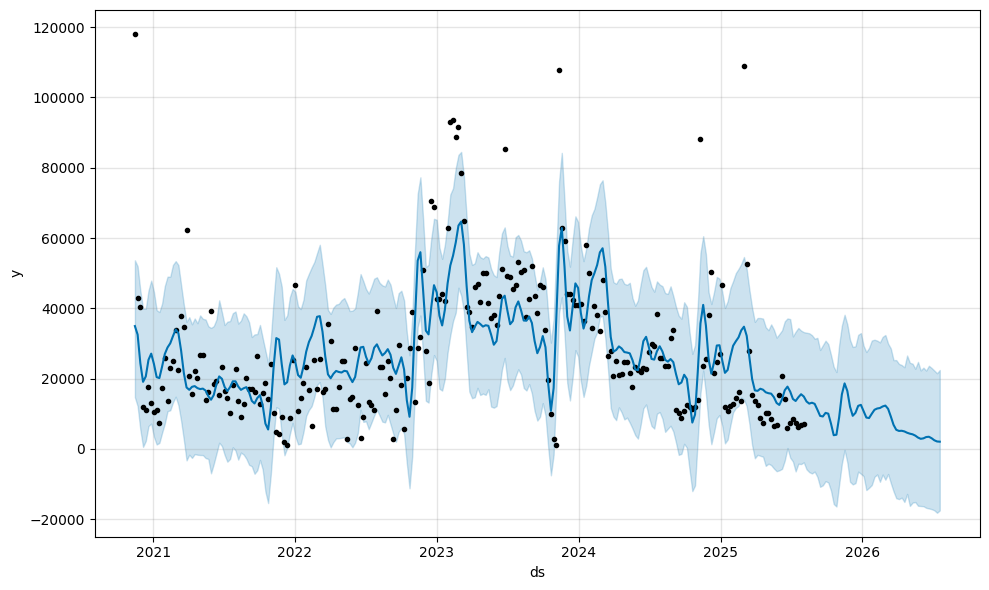

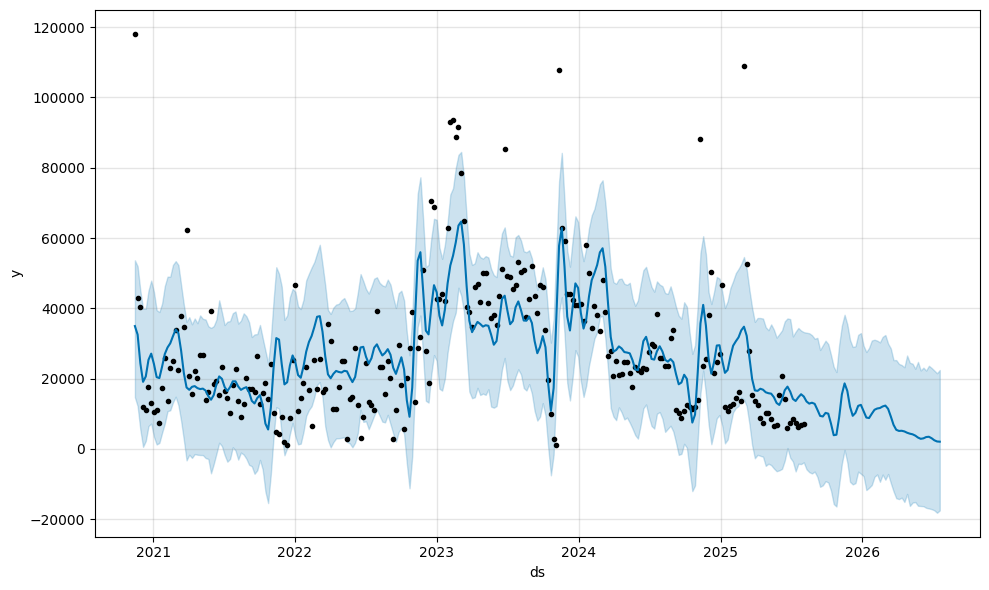

In [86]:
ps5_model.plot(ps5_forecast)

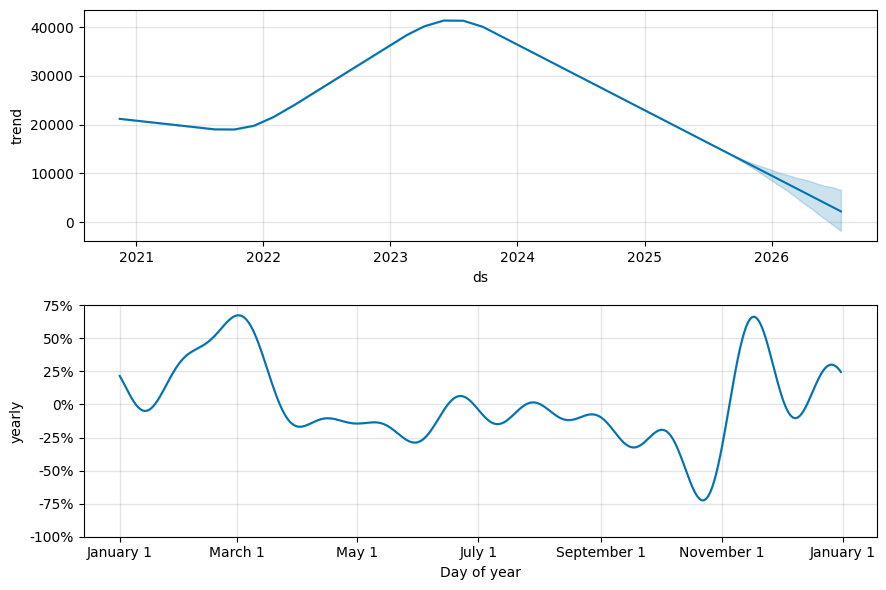

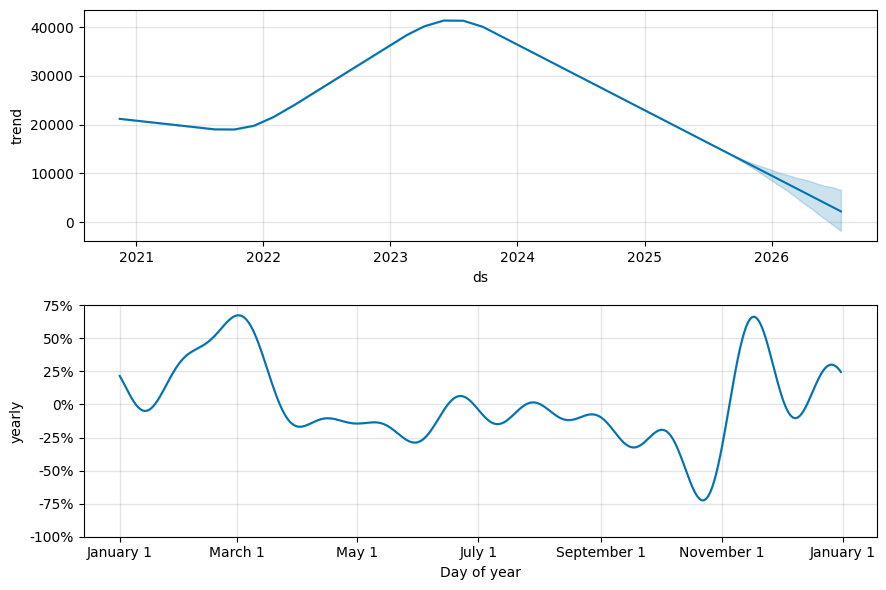

In [87]:
ps5_model.plot_components(ps5_forecast)

21:56:44 - cmdstanpy - INFO - Chain [1] start processing
21:56:44 - cmdstanpy - INFO - Chain [1] done processing


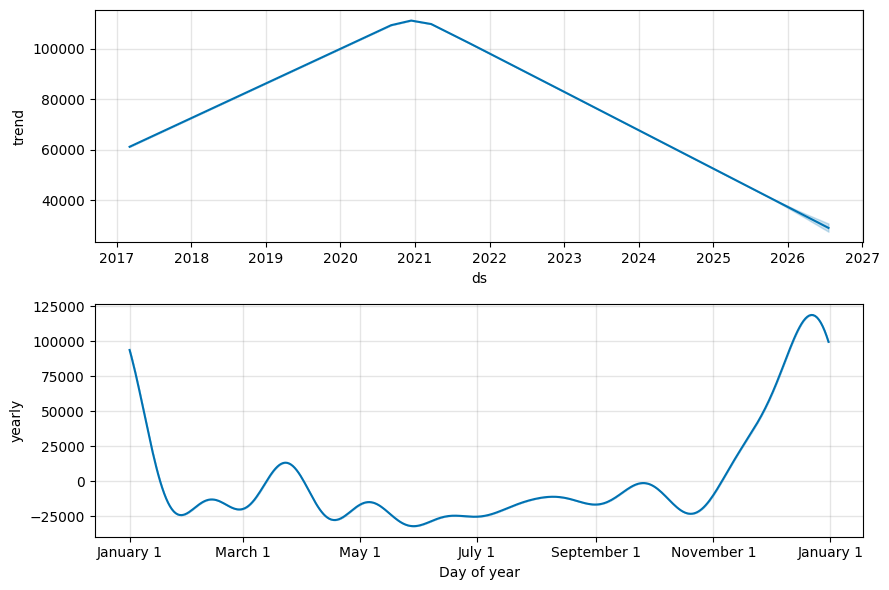

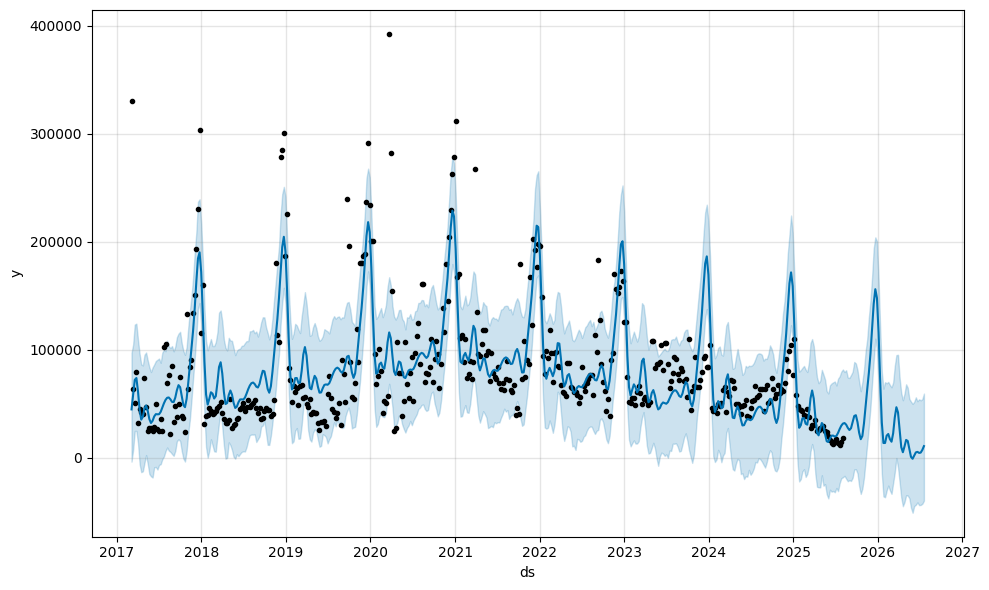

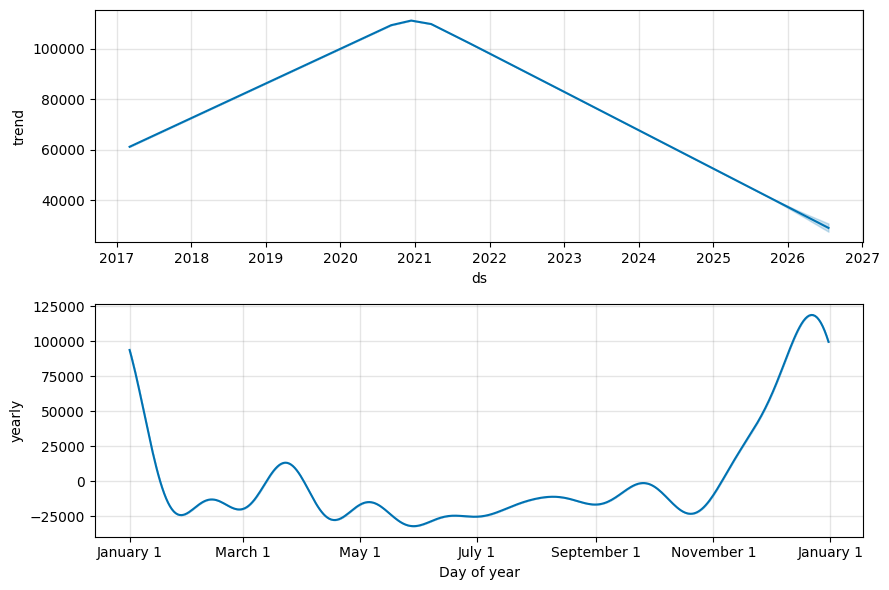

In [22]:
nsw_model, nsw_forecast = forecast_sales(pivot_sales, 'NSW')
nsw_model.plot(nsw_forecast)
nsw_model.plot_components(nsw_forecast)

21:57:38 - cmdstanpy - INFO - Chain [1] start processing
21:57:38 - cmdstanpy - INFO - Chain [1] done processing


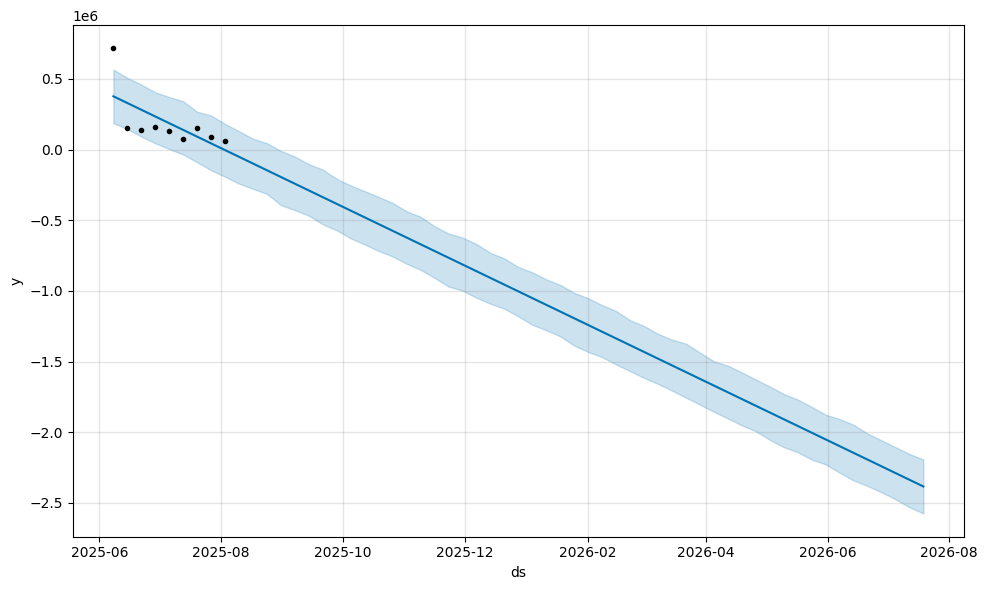

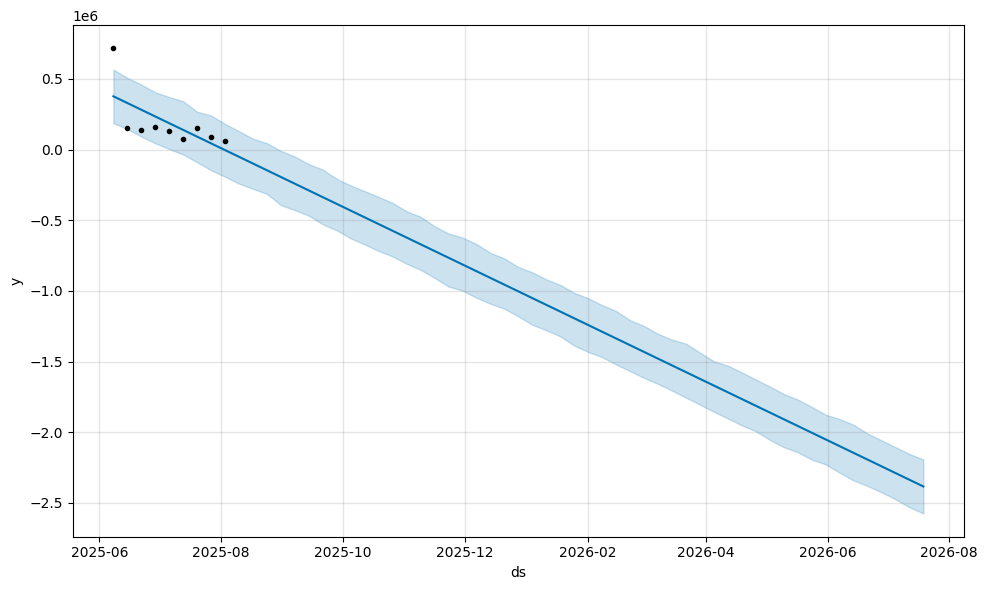

In [24]:
ns2_model, ns2_forecast = forecast_sales(pivot_sales, 'NS2')
ns2_model.plot(ns2_forecast)


21:49:34 - cmdstanpy - INFO - Chain [1] start processing
21:49:34 - cmdstanpy - INFO - Chain [1] done processing


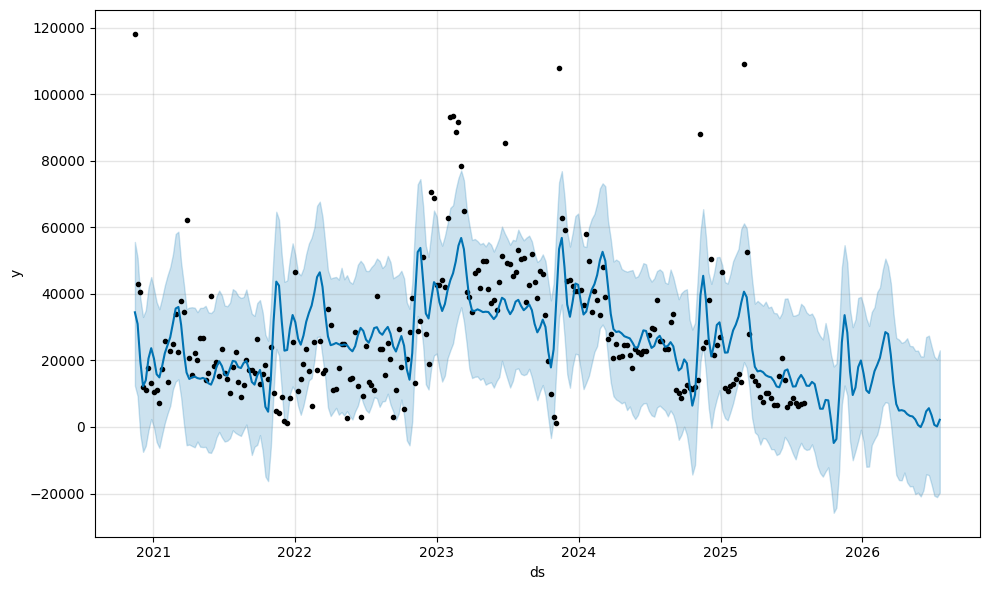

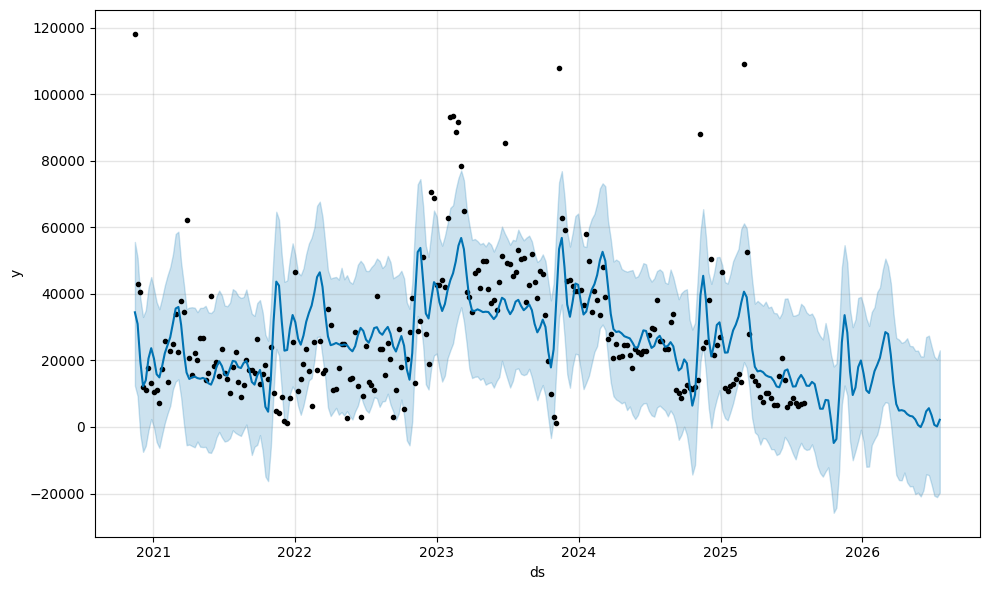

In [13]:
model_ps5 = Prophet()
model_ps5.fit(ps5_sales)

future_ps5_50 = model_ps5.make_future_dataframe(periods=50, freq='W')
forecast_ps5 = model_ps5.predict(future_ps5_50)

model_ps5.plot(forecast_ps5)


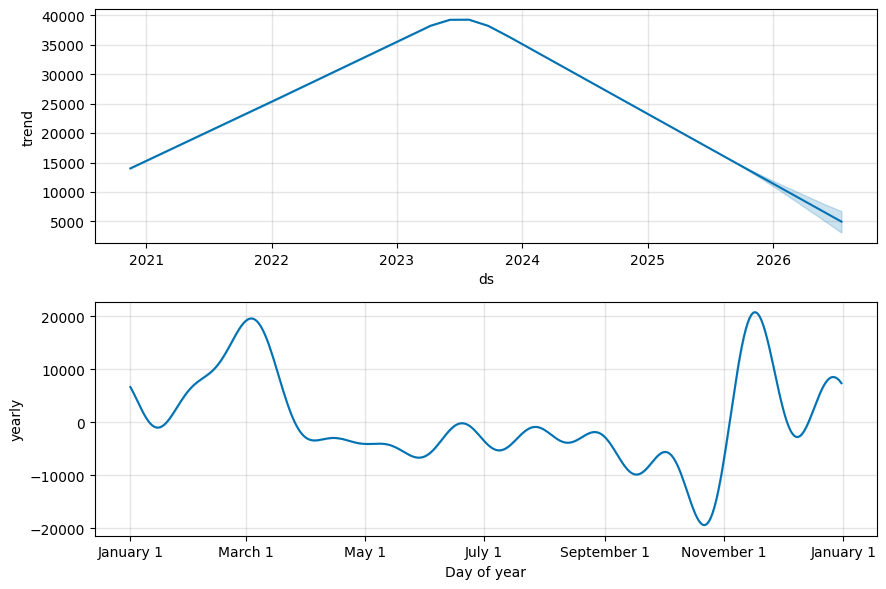

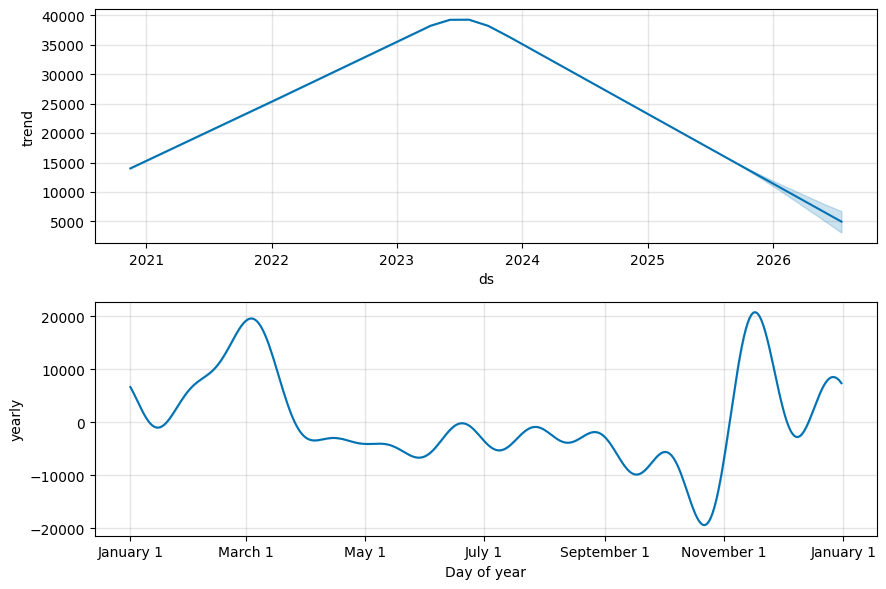

In [14]:
model_ps5.plot_components(forecast)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-15,13999.331005,13264.948046,54733.091458,13999.331005,13999.331005,20450.783824,20450.783824,20450.783824,20450.783824,20450.783824,20450.783824,0.0,0.0,0.0,34450.114829
1,2020-11-22,14191.454820,10755.728658,52231.050138,14191.454820,14191.454820,16754.637091,16754.637091,16754.637091,16754.637091,16754.637091,16754.637091,0.0,0.0,0.0,30946.091911
2,2020-11-29,14383.578635,-1553.430339,39929.504757,14383.578635,14383.578635,5349.808424,5349.808424,5349.808424,5349.808424,5349.808424,5349.808424,0.0,0.0,0.0,19733.387059
3,2020-12-06,14575.702450,-8741.933995,32355.764441,14575.702450,14575.702450,-2357.897226,-2357.897226,-2357.897226,-2357.897226,-2357.897226,-2357.897226,0.0,0.0,0.0,12217.805224
4,2020-12-13,14767.826265,-7321.523321,34586.350857,14767.826265,14767.826265,-748.483250,-748.483250,-748.483250,-748.483250,-748.483250,-748.483250,0.0,0.0,0.0,14019.343015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2026-06-21,5877.666457,-15694.907644,26335.441625,4236.657253,7431.915087,-237.162388,-237.162388,-237.162388,-237.162388,-237.162388,-237.162388,0.0,0.0,0.0,5640.504070
293,2026-06-28,5651.026920,-16251.248131,24129.924323,3951.715506,7261.531550,-2143.257878,-2143.257878,-2143.257878,-2143.257878,-2143.257878,-2143.257878,0.0,0.0,0.0,3507.769042
294,2026-07-05,5424.387383,-19660.124481,22356.226710,3669.063018,7077.647695,-4791.537810,-4791.537810,-4791.537810,-4791.537810,-4791.537810,-4791.537810,0.0,0.0,0.0,632.849572
295,2026-07-12,5197.747845,-18168.460975,22354.766007,3384.489188,6917.409736,-5050.608162,-5050.608162,-5050.608162,-5050.608162,-5050.608162,-5050.608162,0.0,0.0,0.0,147.139683
